# Unit 6 Assignment - What's the Weather Like? - WeatherPy

# Three observable trends based on the data:

In the scatterplot: "LatitudeVsTemp.png," we can see what the temperature is like as we approach the equator...it gets hotter, as expected. 
We can also see (perhaps not as clearly) that it is summer in the Northern Hemisphere at the time the data is collected.  

In the scatterplot: "LatitudeVsHumidity.png," combined with "LatitudeVsTemp.png," we can see a general trend that hotter temps. are often associated with higher humidity.  

I don't see a correlation between latitude and cloudiness, nor between latitude and wind speed.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
# pip install citipy (in terminal) OR !pip install citipy...! in a cell tells it to do it in the terminal 
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

# Perform API Calls

In [4]:
# OpenWeatherMap API Key
# https://openweathermap.org/current#name
# http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

In [5]:
# with my list of cities, loop through them, and get the details of their weather
# using: https://samples.openweathermap.org/data/2.5/weather?q=London,uk&appid=b6907d289e10d714a6e88b30761fae22
    
found_cities = []
temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Latitude = []
Longitude = []

for city in cities:
    params = {
        'q' : city,
        'units': 'Imperial',
        'APPID' : api_key
    }

    response = req.get(url, params=params).json()
    
    print("Searching for " + city)
    
    try:
        found_cities.append(response['name'])
        temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Latitude.append(response['coord']['lat'])
        Longitude.append(response['coord']['lon'])
    
        print(city + " found")
        
    except KeyError:
        print('City not found')
        continue

Searching for albany
albany found
Searching for kapaa
kapaa found
Searching for oksfjord
oksfjord found
Searching for barentsburg
City not found
Searching for richards bay
richards bay found
Searching for pozo colorado
pozo colorado found
Searching for guerrero negro
guerrero negro found
Searching for mataura
mataura found
Searching for port alfred
port alfred found
Searching for shahkot
shahkot found
Searching for new norfolk
new norfolk found
Searching for barrow
barrow found
Searching for torbay
torbay found
Searching for khandyga
khandyga found
Searching for ushuaia
ushuaia found
Searching for nizhneyansk
City not found
Searching for westport
westport found
Searching for opuwo
opuwo found
Searching for provideniya
provideniya found
Searching for butaritari
butaritari found
Searching for sentyabrskiy
City not found
Searching for arraial do cabo
arraial do cabo found
Searching for belushya guba
City not found
Searching for lolua
City not found
Searching for atambua
atambua found
Sear

Searching for souillac
souillac found
Searching for hohhot
hohhot found
Searching for strelka
strelka found
Searching for katsuura
katsuura found
Searching for egvekinot
egvekinot found
Searching for aleysk
aleysk found
Searching for puerto del rosario
puerto del rosario found
Searching for shihezi
shihezi found
Searching for saleaula
City not found
Searching for matagami
matagami found
Searching for aklavik
aklavik found
Searching for pustoshka
pustoshka found
Searching for tapaua
City not found
Searching for touros
touros found
Searching for san cristobal
san cristobal found
Searching for nuevo progreso
nuevo progreso found
Searching for husavik
husavik found
Searching for ostroleka
ostroleka found
Searching for harbour breton
harbour breton found
Searching for carutapera
carutapera found
Searching for adrar
adrar found
Searching for ribeira grande
ribeira grande found
Searching for kaa-khem
kaa-khem found
Searching for cumberland
cumberland found
Searching for matara
matara found
Se

Searching for praia
praia found
Searching for nguiu
City not found
Searching for shumskiy
shumskiy found
Searching for takoradi
takoradi found
Searching for avera
avera found
Searching for ust-maya
ust-maya found
Searching for olga
olga found
Searching for inhambane
inhambane found
Searching for lata
lata found
Searching for sapao
City not found
Searching for normandin
normandin found
Searching for kpandae
kpandae found
Searching for tumannyy
City not found
Searching for maniitsoq
maniitsoq found
Searching for nampula
nampula found
Searching for bolungarvik
City not found
Searching for yar-sale
yar-sale found
Searching for marsh harbour
marsh harbour found
Searching for zharkent
zharkent found
Searching for daxian
City not found
Searching for coihaique
coihaique found
Searching for ondjiva
ondjiva found
Searching for abu dhabi
abu dhabi found
Searching for chicama
chicama found
Searching for loreto
loreto found
Searching for nara
nara found
Searching for saryozek
saryozek found
Searchi

In [9]:
# make a df from list, and then use method 'to_csv'
    # Include a print log of each city as it's being processed with the city number & name.

City_Weather_Data_df = pd.DataFrame({"City": found_cities, 
                                     "Lat": Latitude, 
                                     "Lng": Longitude,
                                     "Max Temp": temp,
                                     "Humidity": Humidity,
                                     "Cloudiness": Cloudiness,
                                     "Wind Speed": Wind_Speed})

City_Weather_Data_df.to_csv("output_data/City_Weather_Data.csv", index=False, header=True)

City_Weather_Data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,42.65,-73.75,84.02,60,75,8.05
1,Kapaa,22.08,-159.32,78.98,93,90,18.34
2,Oksfjord,70.24,22.35,48.20,70,0,11.41
3,Richards Bay,-28.77,32.06,49.29,96,0,2.95
4,Pozo Colorado,-23.49,-58.80,73.50,65,0,9.22


# Create Scatter Plots

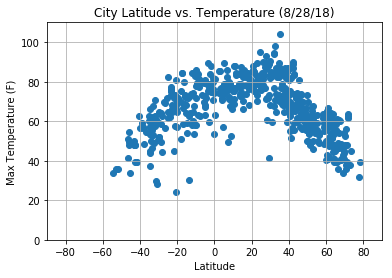

In [11]:
plt.scatter(Latitude, temp)
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Temperature (8/28/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

## x & y limits 
plt.xlim(-90,90)
plt.ylim(0,110)

# Save both a CSV of all data retrieved ABOVE and png images for each scatter plot.
# Save Figure to data folder
plt.savefig("output_data/LatitudeVsTemp.png")
# Show plot
plt.show()

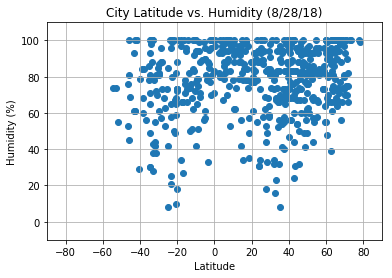

In [12]:
plt.scatter(Latitude, Humidity)
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity (8/28/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

## x & y limits 
plt.xlim(-90,90)
plt.ylim(-10,110)

# Save Figure to data folder
plt.savefig("output_data/LatitudeVsHumidity.png")
# Show plot
plt.show()

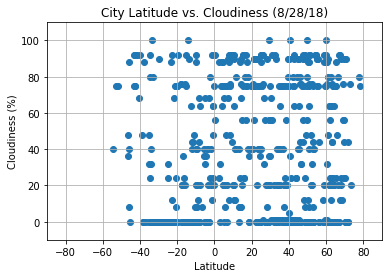

In [13]:
plt.scatter(Latitude, Cloudiness)
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (8/28/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

## x & y limits 
plt.xlim(-90,90)
plt.ylim(-10,110)

# Save Figure to data folder
plt.savefig("output_data/LatitudeVsCloudiness.png")
# Show plot
plt.show()

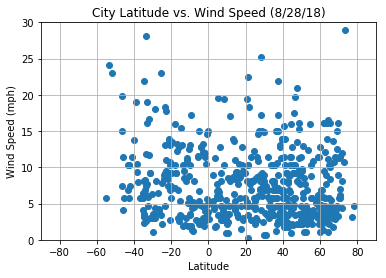

In [14]:
plt.scatter(Latitude, Wind_Speed)
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed (8/28/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

## x & y limits 
plt.xlim(-90,90)
plt.ylim(0,30)

# Save Figure to data folder
plt.savefig("output_data/LatitudeVsWindSpeed.png")
# Show plot
plt.show()